In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering,KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Task 1: Exploratory Data Analysis (EDA):

In [3]:
df=pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.median()

,0
Type,2.000
Alcohol,13.050
Malic,1.865
Ash,2.360
Alcalinity,19.500
Magnesium,98.000
Phenols,2.355
Flavanoids,2.135
Nonflavanoids,0.340
Proanthocyanins,1.555


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
df.isnull().sum()

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


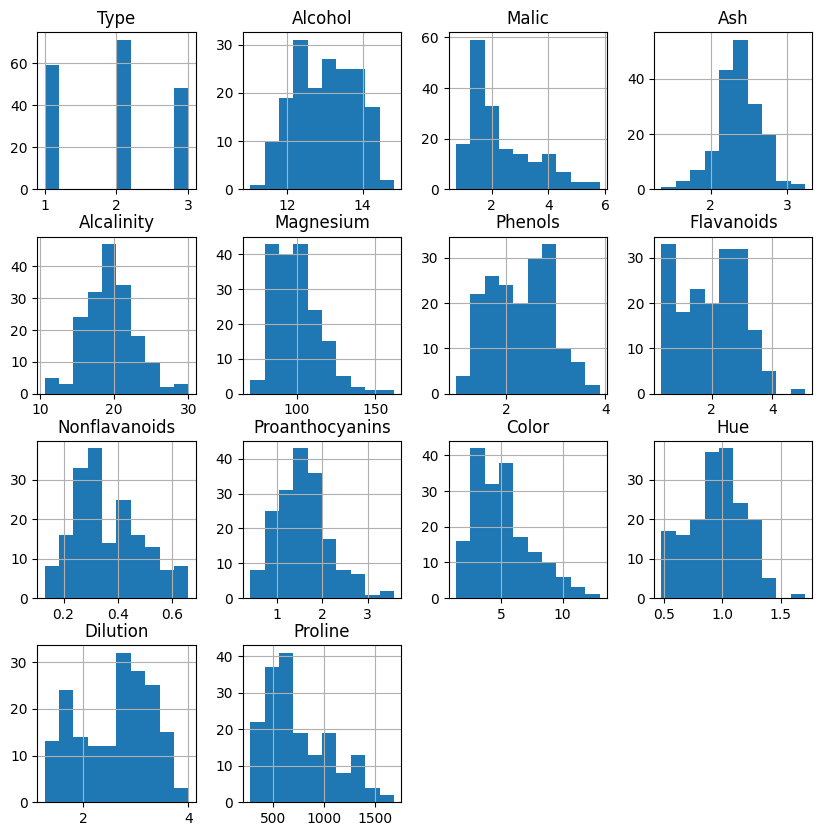

In [8]:
#histogram plot
df.hist(figsize=(10,10))
plt.show()

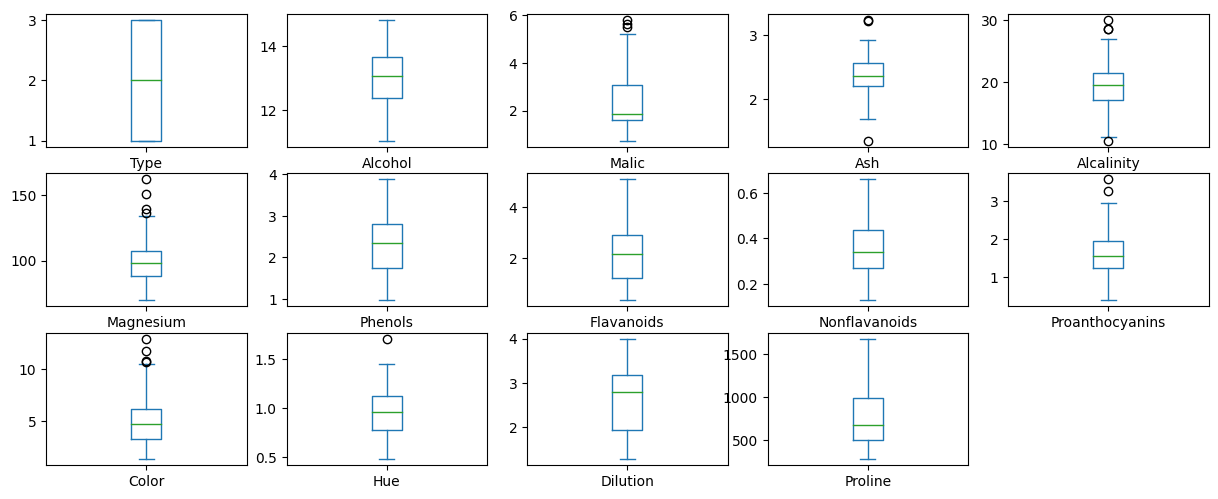

In [9]:
#box plot
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,10))
plt.show()

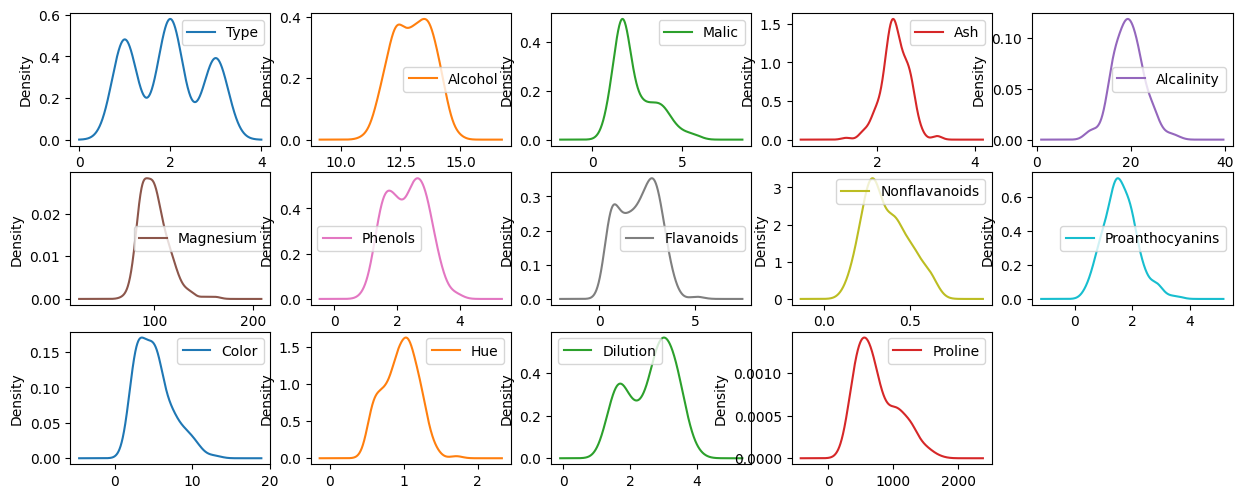

In [10]:
#density plot
df.plot(kind='density',subplots=True,layout=(5,5),figsize=(15,10),sharex=False)
plt.show()

In [11]:
corr=df.corr()
corr

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


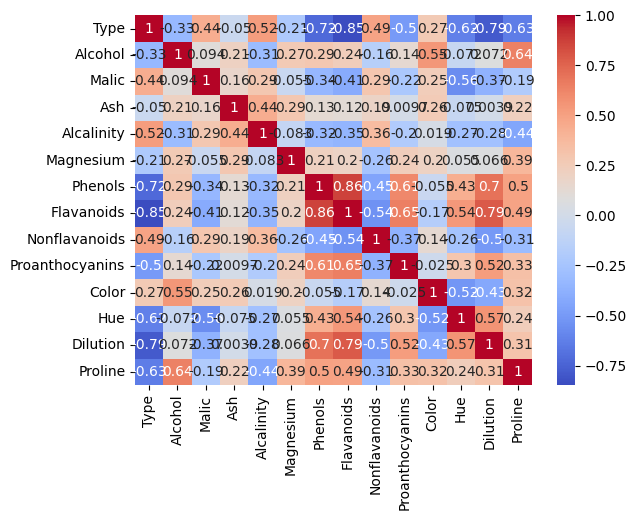

In [12]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

# Task 2: Dimensionality Reduction with PCA:

In [13]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
scaled_data

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [14]:
pca=PCA()
pca_data=pca.fit_transform(scaled_data)

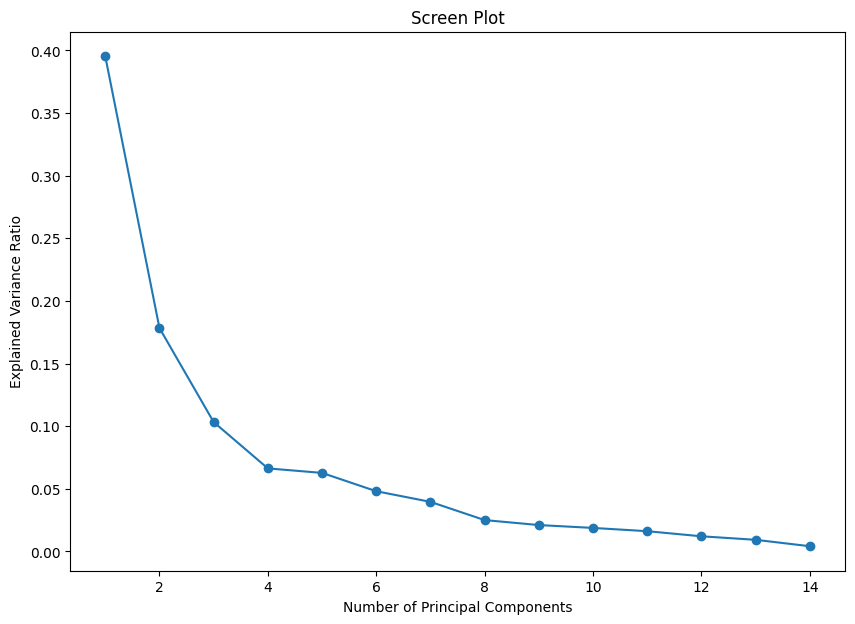

In [15]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Screen Plot')
plt.show()

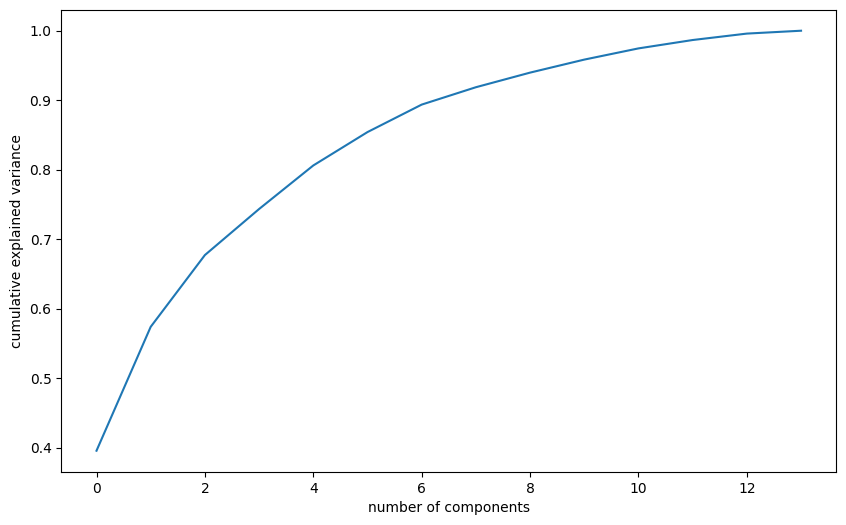

In [16]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show
import warnings
warnings.filterwarnings('ignore')

In [17]:
optimal_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f'Optimal number of components: {optimal_components}')

Optimal number of components: 10


In [18]:
pca=PCA(n_components=optimal_components)
pca_data=pca.fit_transform(scaled_data)

In [19]:
#loadings or weights
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

In [20]:
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615])

# Task 3: Clustering with Original Data:

**Hierarchical Clustering**

In [21]:
linked = linkage(scaled_data, method='ward')


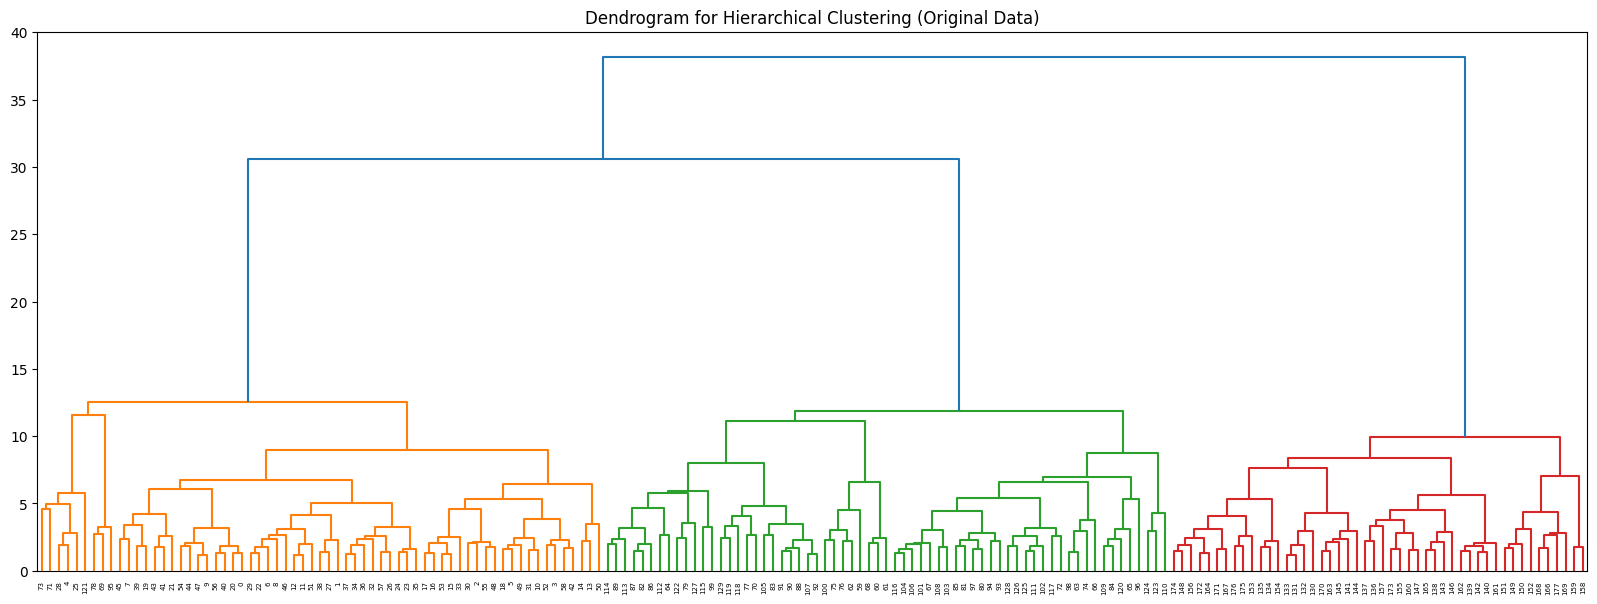

In [22]:
plt.figure(figsize=(20, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering (Original Data)')
plt.show()


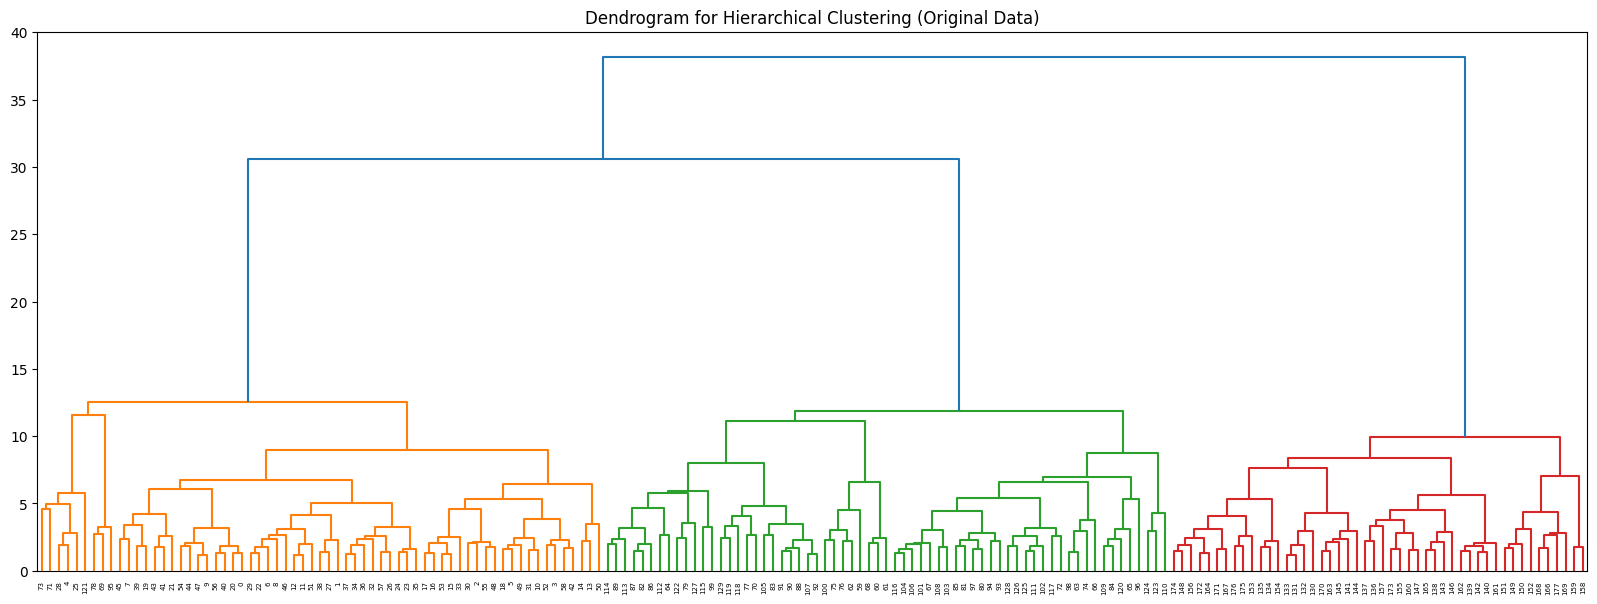

In [23]:
plt.figure(figsize=(20, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering (Original Data)')
plt.show()

In [24]:
hc_original = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_hc_original = hc_original.fit_predict(scaled_data)

In [25]:
silhouette_hc_original = silhouette_score(scaled_data, labels_hc_original)
print(f'Silhouette Score for Hierarchical Clustering (Original Data): {silhouette_hc_original}')

Silhouette Score for Hierarchical Clustering (Original Data): 0.3005913531964526


**KMeans Clustering**

In [26]:
n_clusters = 3  # Adjust based on your dataset
kmeans_original = KMeans(n_clusters=n_clusters,random_state=42)
kmeans_original.fit(scaled_data)
labels_original = kmeans_original.labels_

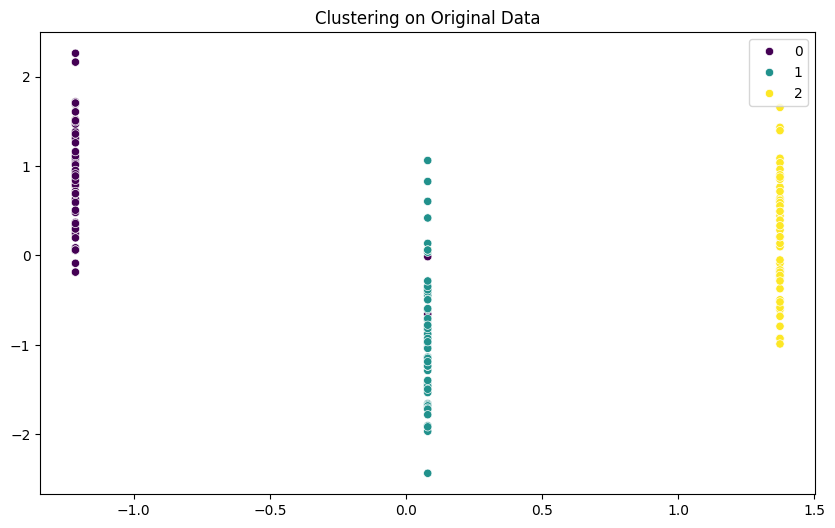

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=labels_original, palette='viridis')
plt.title('Clustering on Original Data')
plt.show()

In [28]:
silhouette_original = silhouette_score(scaled_data, labels_original)
print(f'Silhouette Score on Original Data: {silhouette_original}')

Silhouette Score on Original Data: 0.30773604383565206


# Task 4: Clustering with PCA Data:

**Hierarchical Clustering on PCA Data**

In [29]:
linked_pca = linkage(pca_data, method='ward')

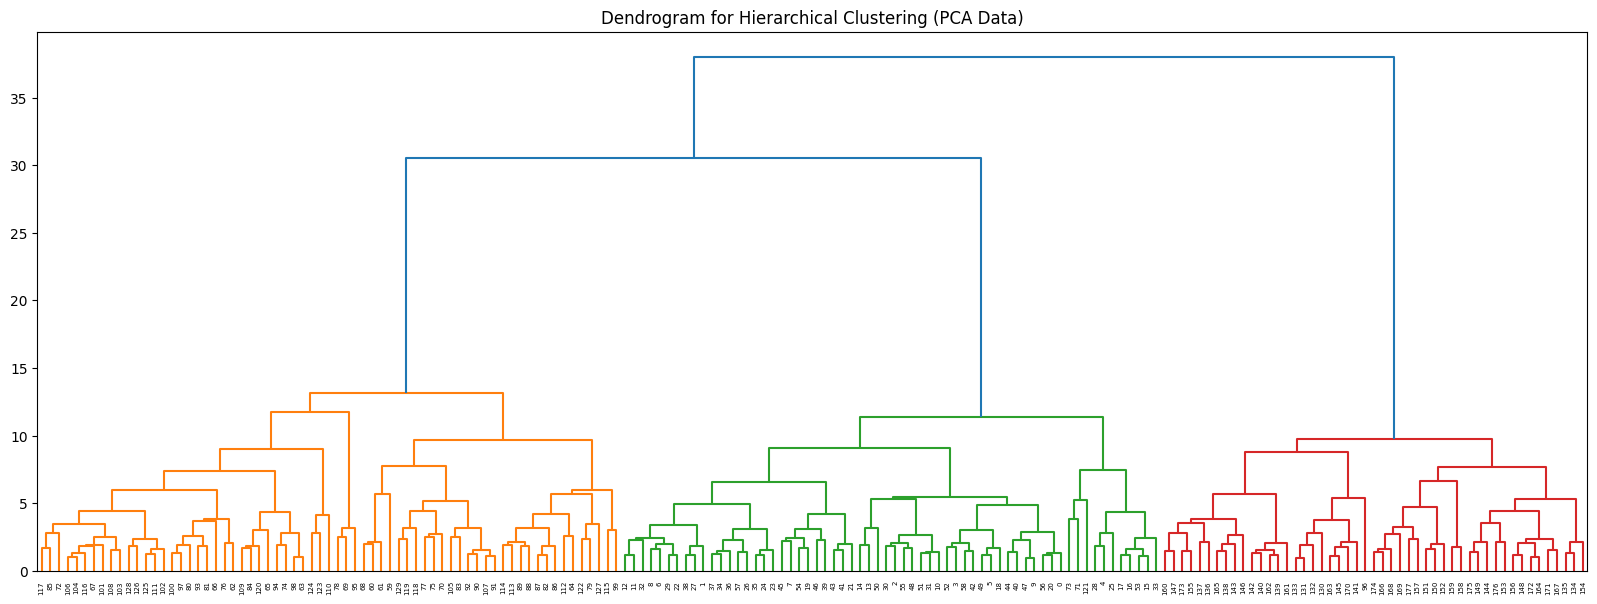

In [30]:
plt.figure(figsize=(20, 7))
dendrogram(linked_pca, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering (PCA Data)')
plt.show()

In [31]:
hc_pca = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels_hc_pca = hc_pca.fit_predict(pca_data)

In [32]:
silhouette_hc_pca = silhouette_score(pca_data, labels_hc_pca)
print(f'Silhouette Score for Hierarchical Clustering (PCA Data): {silhouette_hc_pca}')

Silhouette Score for Hierarchical Clustering (PCA Data): 0.31726484469839533


**Kmeans Clustering on PCA Data**

In [33]:
kmeans_pca = KMeans(n_clusters=n_clusters)
kmeans_pca.fit(pca_data)
labels_pca = kmeans_pca.labels_
centroids_pca = kmeans_pca.cluster_centers_
print(centroids_pca)

[[ 1.21711421e-01  1.75036892e+00  1.28333665e-01  9.42333870e-02
   5.62038605e-02  1.16008510e-01  1.64510535e-02  6.44114086e-03
  -4.65952378e-02 -1.09087035e-02]
 [-2.54885890e+00 -9.36610484e-01  1.63163246e-03 -1.77491267e-01
  -1.17355806e-01 -2.00419244e-01  3.17344970e-02  2.79312555e-02
   6.39520105e-02  6.31297712e-02]
 [ 3.05866503e+00 -1.20826261e+00 -1.77541159e-01  9.57310533e-02
   7.16408426e-02  9.49678146e-02 -6.26481511e-02 -4.41488629e-02
  -1.72070147e-02 -6.49625037e-02]]


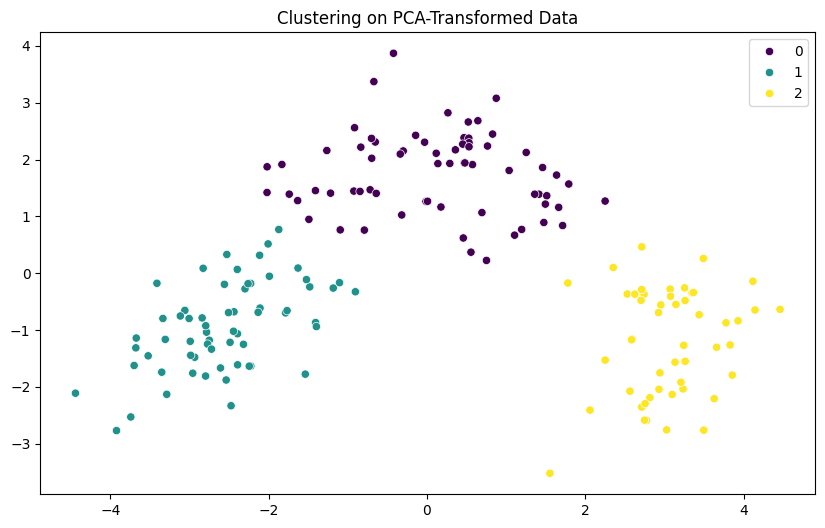

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels_pca, palette='viridis')
plt.title('Clustering on PCA-Transformed Data')
plt.show()

In [35]:
silhouette_pca = silhouette_score(pca_data, labels_pca)
print(f'Silhouette Score on PCA Data: {silhouette_pca}')

Silhouette Score on PCA Data: 0.32292055407233033


In [36]:
finalDf = pd.concat([pd.DataFrame(pca_data[:,0:2],columns=['pc1','pc2']),df[['Type']]], axis = 1)
finalDf

,pc1,pc2,Type
0,-3.522934,-1.453098,1
1,-2.528858,0.330019,1
2,-2.785029,-1.036936,1
3,-3.922588,-2.768210,1
4,-1.407511,-0.867773,1
...,...,...,...
173,3.627996,-2.206617,3
174,2.942729,-1.752263,3
175,3.027272,-2.756040,3
176,2.755222,-2.293784,3


<Axes: xlabel='pc1', ylabel='pc2'>

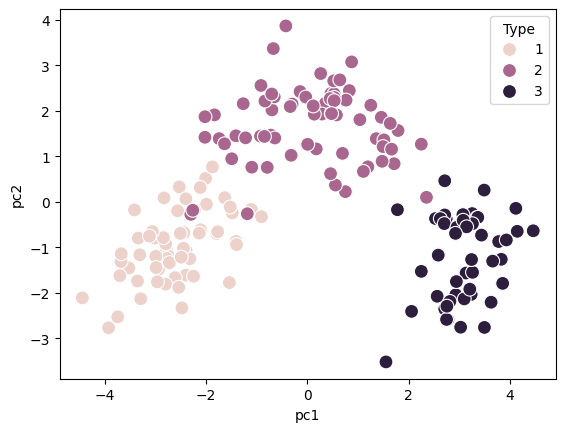

In [37]:
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type', s = 100) # Use 's' to control point size

# Task 5: Comparison and Analysis:

In [38]:
# Compare Silhouette Scores
print(f'Original Data Silhouette Score: {silhouette_original}')
print(f'PCA Data Silhouette Score: {silhouette_pca}')

Original Data Silhouette Score: 0.30773604383565206
PCA Data Silhouette Score: 0.32292055407233033


In [39]:
print(f'Original Data K-Means Silhouette Score: {silhouette_original}')
print(f'PCA Data K-Means Silhouette Score: {silhouette_pca}')
print(f'Original Data Hierarchical Silhouette Score: {silhouette_hc_original}')
print(f'PCA Data Hierarchical Silhouette Score: {silhouette_hc_pca}')

Original Data K-Means Silhouette Score: 0.30773604383565206
PCA Data K-Means Silhouette Score: 0.32292055407233033
Original Data Hierarchical Silhouette Score: 0.3005913531964526
PCA Data Hierarchical Silhouette Score: 0.31726484469839533
